In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [2]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [5]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [8]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [9]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 54s 107ms/step - loss: 0.6463 - accuracy: 0.5422 - val_loss: 0.5510 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 27s 68ms/step - loss: 0.4282 - accuracy: 0.7823 - val_loss: 0.3717 - val_accuracy: 0.8396
Epoch 3/10
391/391 [==============================] - 26s 66ms/step - loss: 0.3490 - accuracy: 0.8459 - val_loss: 0.3573 - val_accuracy: 0.8245
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 0.3257 - accuracy: 0.8594 - val_loss: 0.3292 - val_accuracy: 0.8495
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: 0.3169 - accuracy: 0.8639 - val_loss: 0.3269 - val_accuracy: 0.8542
Epoch 6/10
391/391 [==============================] - 26s 67ms/step - loss: 0.3113 - accuracy: 0.8651 - val_loss: 0.3256 - val_accuracy: 0.8474
Epoch 7/10
391/391 [==============================] - 26s 65ms/step - loss: 0.3063 - accuracy: 0.8687 - val_loss: 0.3189 - val_accuracy

In [12]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 12s 32ms/step - loss: 0.3202 - accuracy: 0.8645
Test Loss: 0.320154070854187
Test Accuracy: 0.8644800186157227


(0.0, 0.6638069078326225)

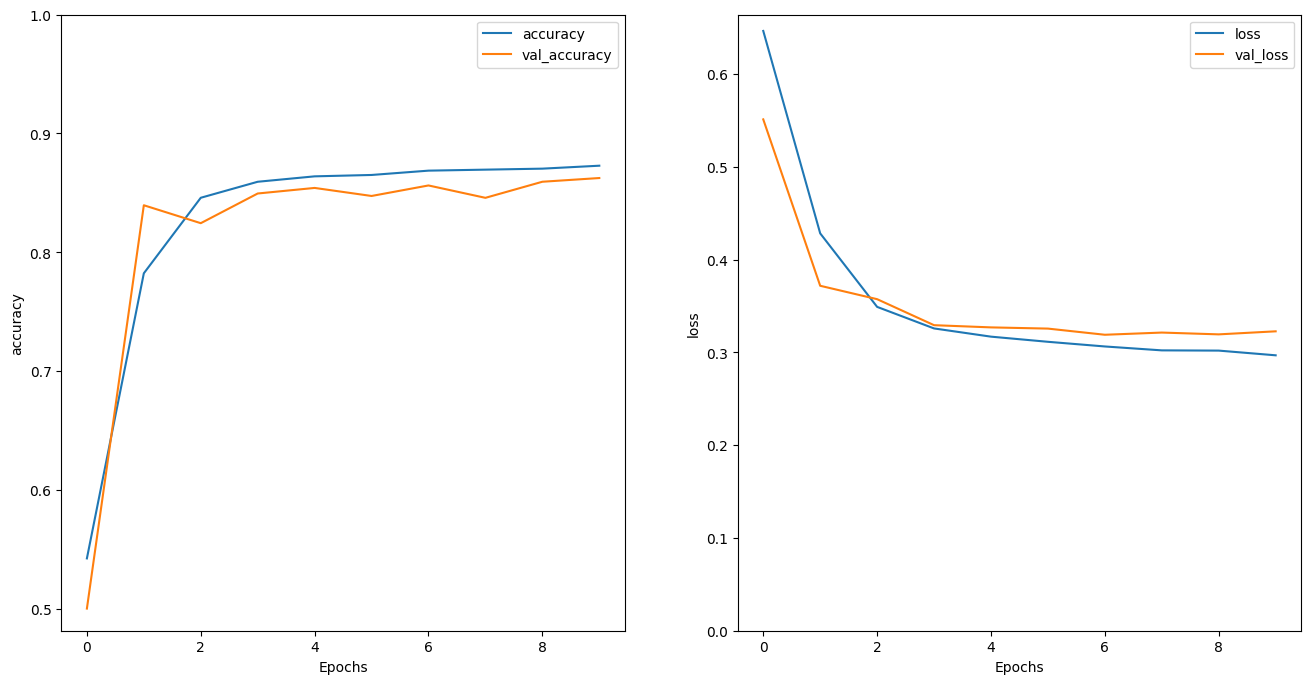

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [14]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 83s 156ms/step - loss: 0.6444 - accuracy: 0.5770 - val_loss: 0.4625 - val_accuracy: 0.7823
Epoch 2/10
391/391 [==============================] - 47s 121ms/step - loss: 0.3949 - accuracy: 0.8240 - val_loss: 0.3616 - val_accuracy: 0.8391
Epoch 3/10
391/391 [==============================] - 48s 122ms/step - loss: 0.3466 - accuracy: 0.8502 - val_loss: 0.3465 - val_accuracy: 0.8510
Epoch 4/10
391/391 [==============================] - 46s 118ms/step - loss: 0.3240 - accuracy: 0.8607 - val_loss: 0.3365 - val_accuracy: 0.8411
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3106 - accuracy: 0.8664 - val_loss: 0.3230 - val_accuracy: 0.8500
Epoch 6/10
391/391 [==============================] - 48s 122ms/step - loss: 0.3060 - accuracy: 0.8691 - val_loss: 0.3207 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 48s 121ms/step - loss: 0.3074 - accuracy: 0.8696 - val_loss: 0.3235 - val_ac

In [17]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 51ms/step - loss: 0.3151 - accuracy: 0.8530
Test Loss: 0.3151053190231323
Test Accuracy: 0.8529599905014038


In [18]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 5s 5s/step
[[-1.7503996]]


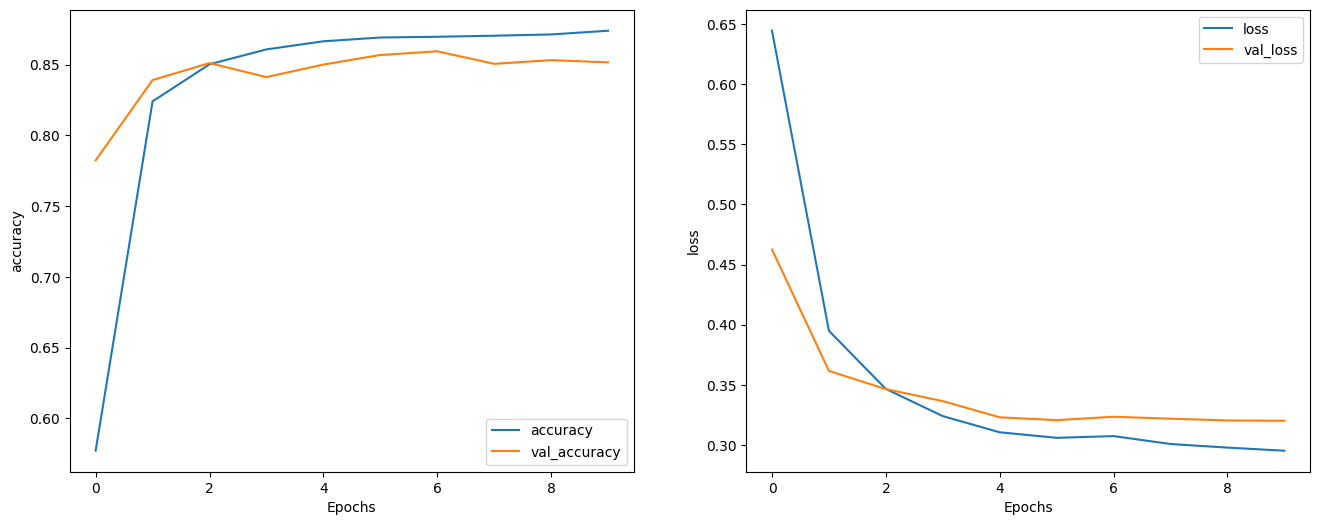

In [19]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')